# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

There are two approaches mainly to market their products and services. They are through mass campaigns,
targeting general indiscriminate public or directed
marketing, targeting a specific set of contacts

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.exceptions import ConvergenceWarning
import time



In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
missing_values_count = df.isna().sum()


print(missing_values_count)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [7]:
#no missing data

In [8]:
#Find duplicates
duplicates = df[df.duplicated()]
print("Columns with duplicate Data:")
print(duplicates)



Columns with duplicate Data:
       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71 

In [9]:
# These duplicates are ok

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
# Find nulls
null_counts = df.isnull().sum()

print(null_counts)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


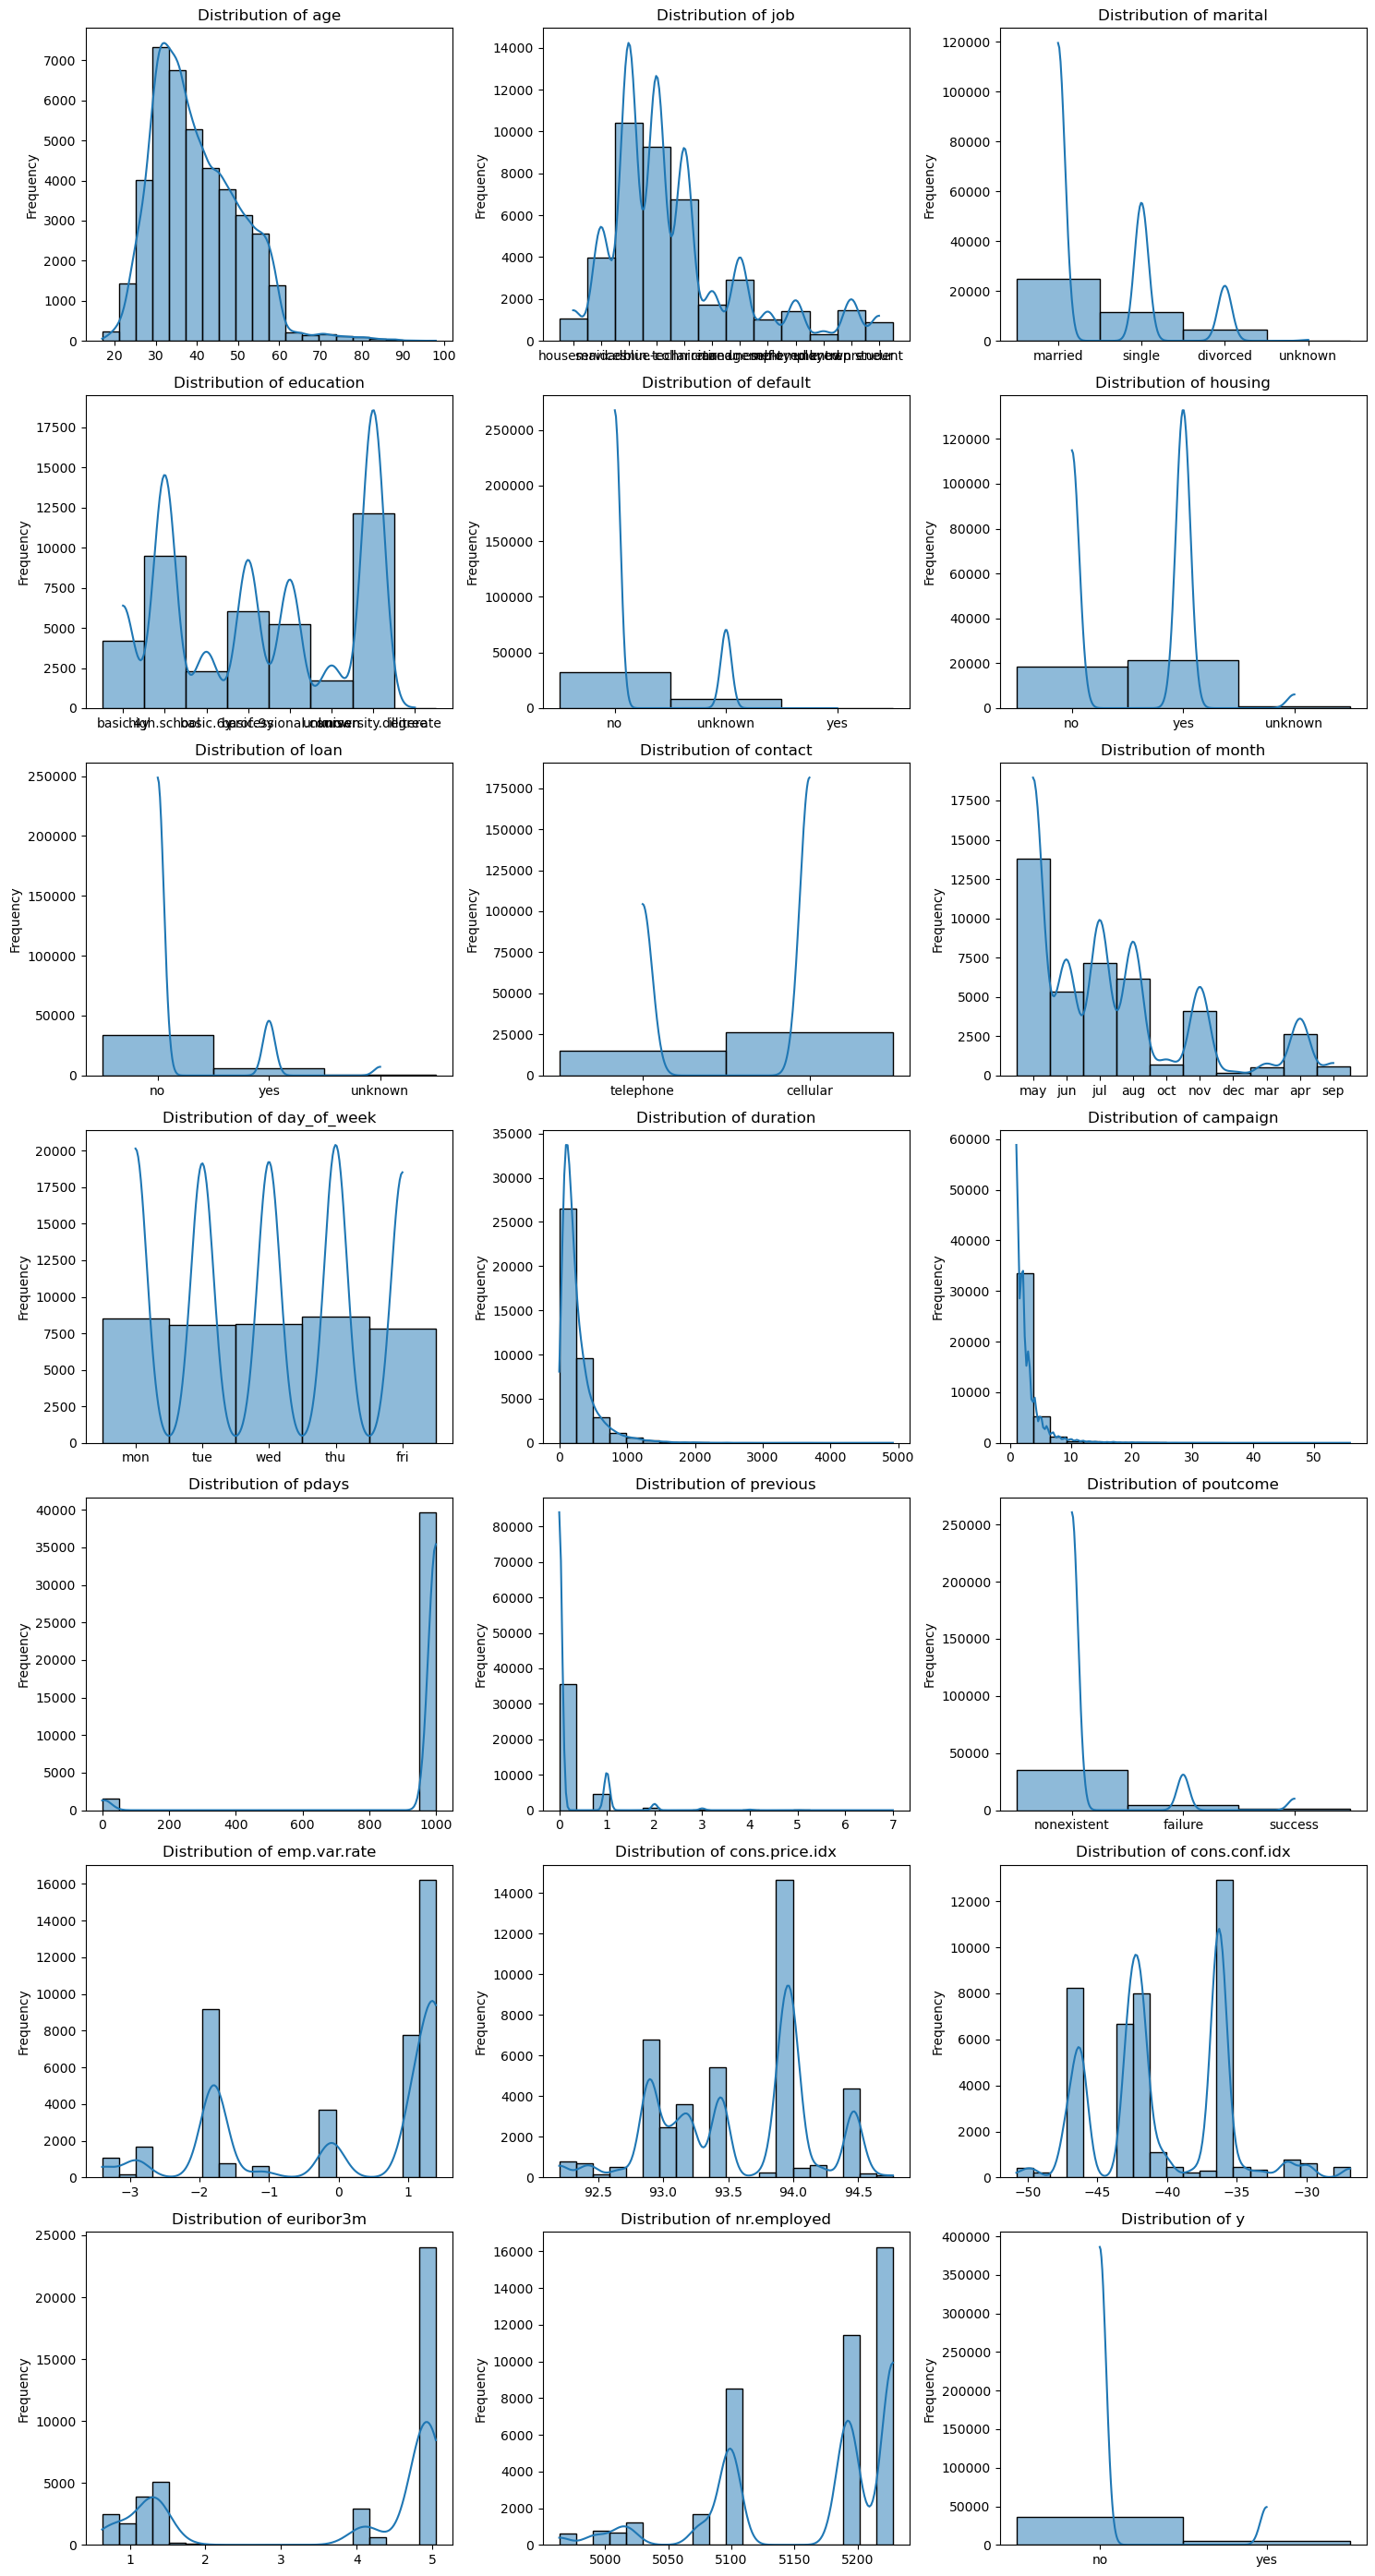

In [12]:
num_cols = len(df.columns)
num_rows = math.ceil(num_cols / 3)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 4*num_rows))

for i, column in enumerate(df.columns):
    row = i // 3
    col = i % 3
    sns.histplot(data=df, x=column, kde=True, bins=20, ax=axes[row, col])  # Create distribution plot with 20 bins for each column
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel('')  # Remove x-label to save space
    axes[row, col].set_ylabel('Frequency')

# Remove any empty subplots if the number of columns is not a multiple of 3
if num_cols % 3 != 0:
    for i in range(num_cols % 3, 3):
        fig.delaxes(axes[row, i])

plt.tight_layout()
plt.show()

/Users/mohangunturu/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


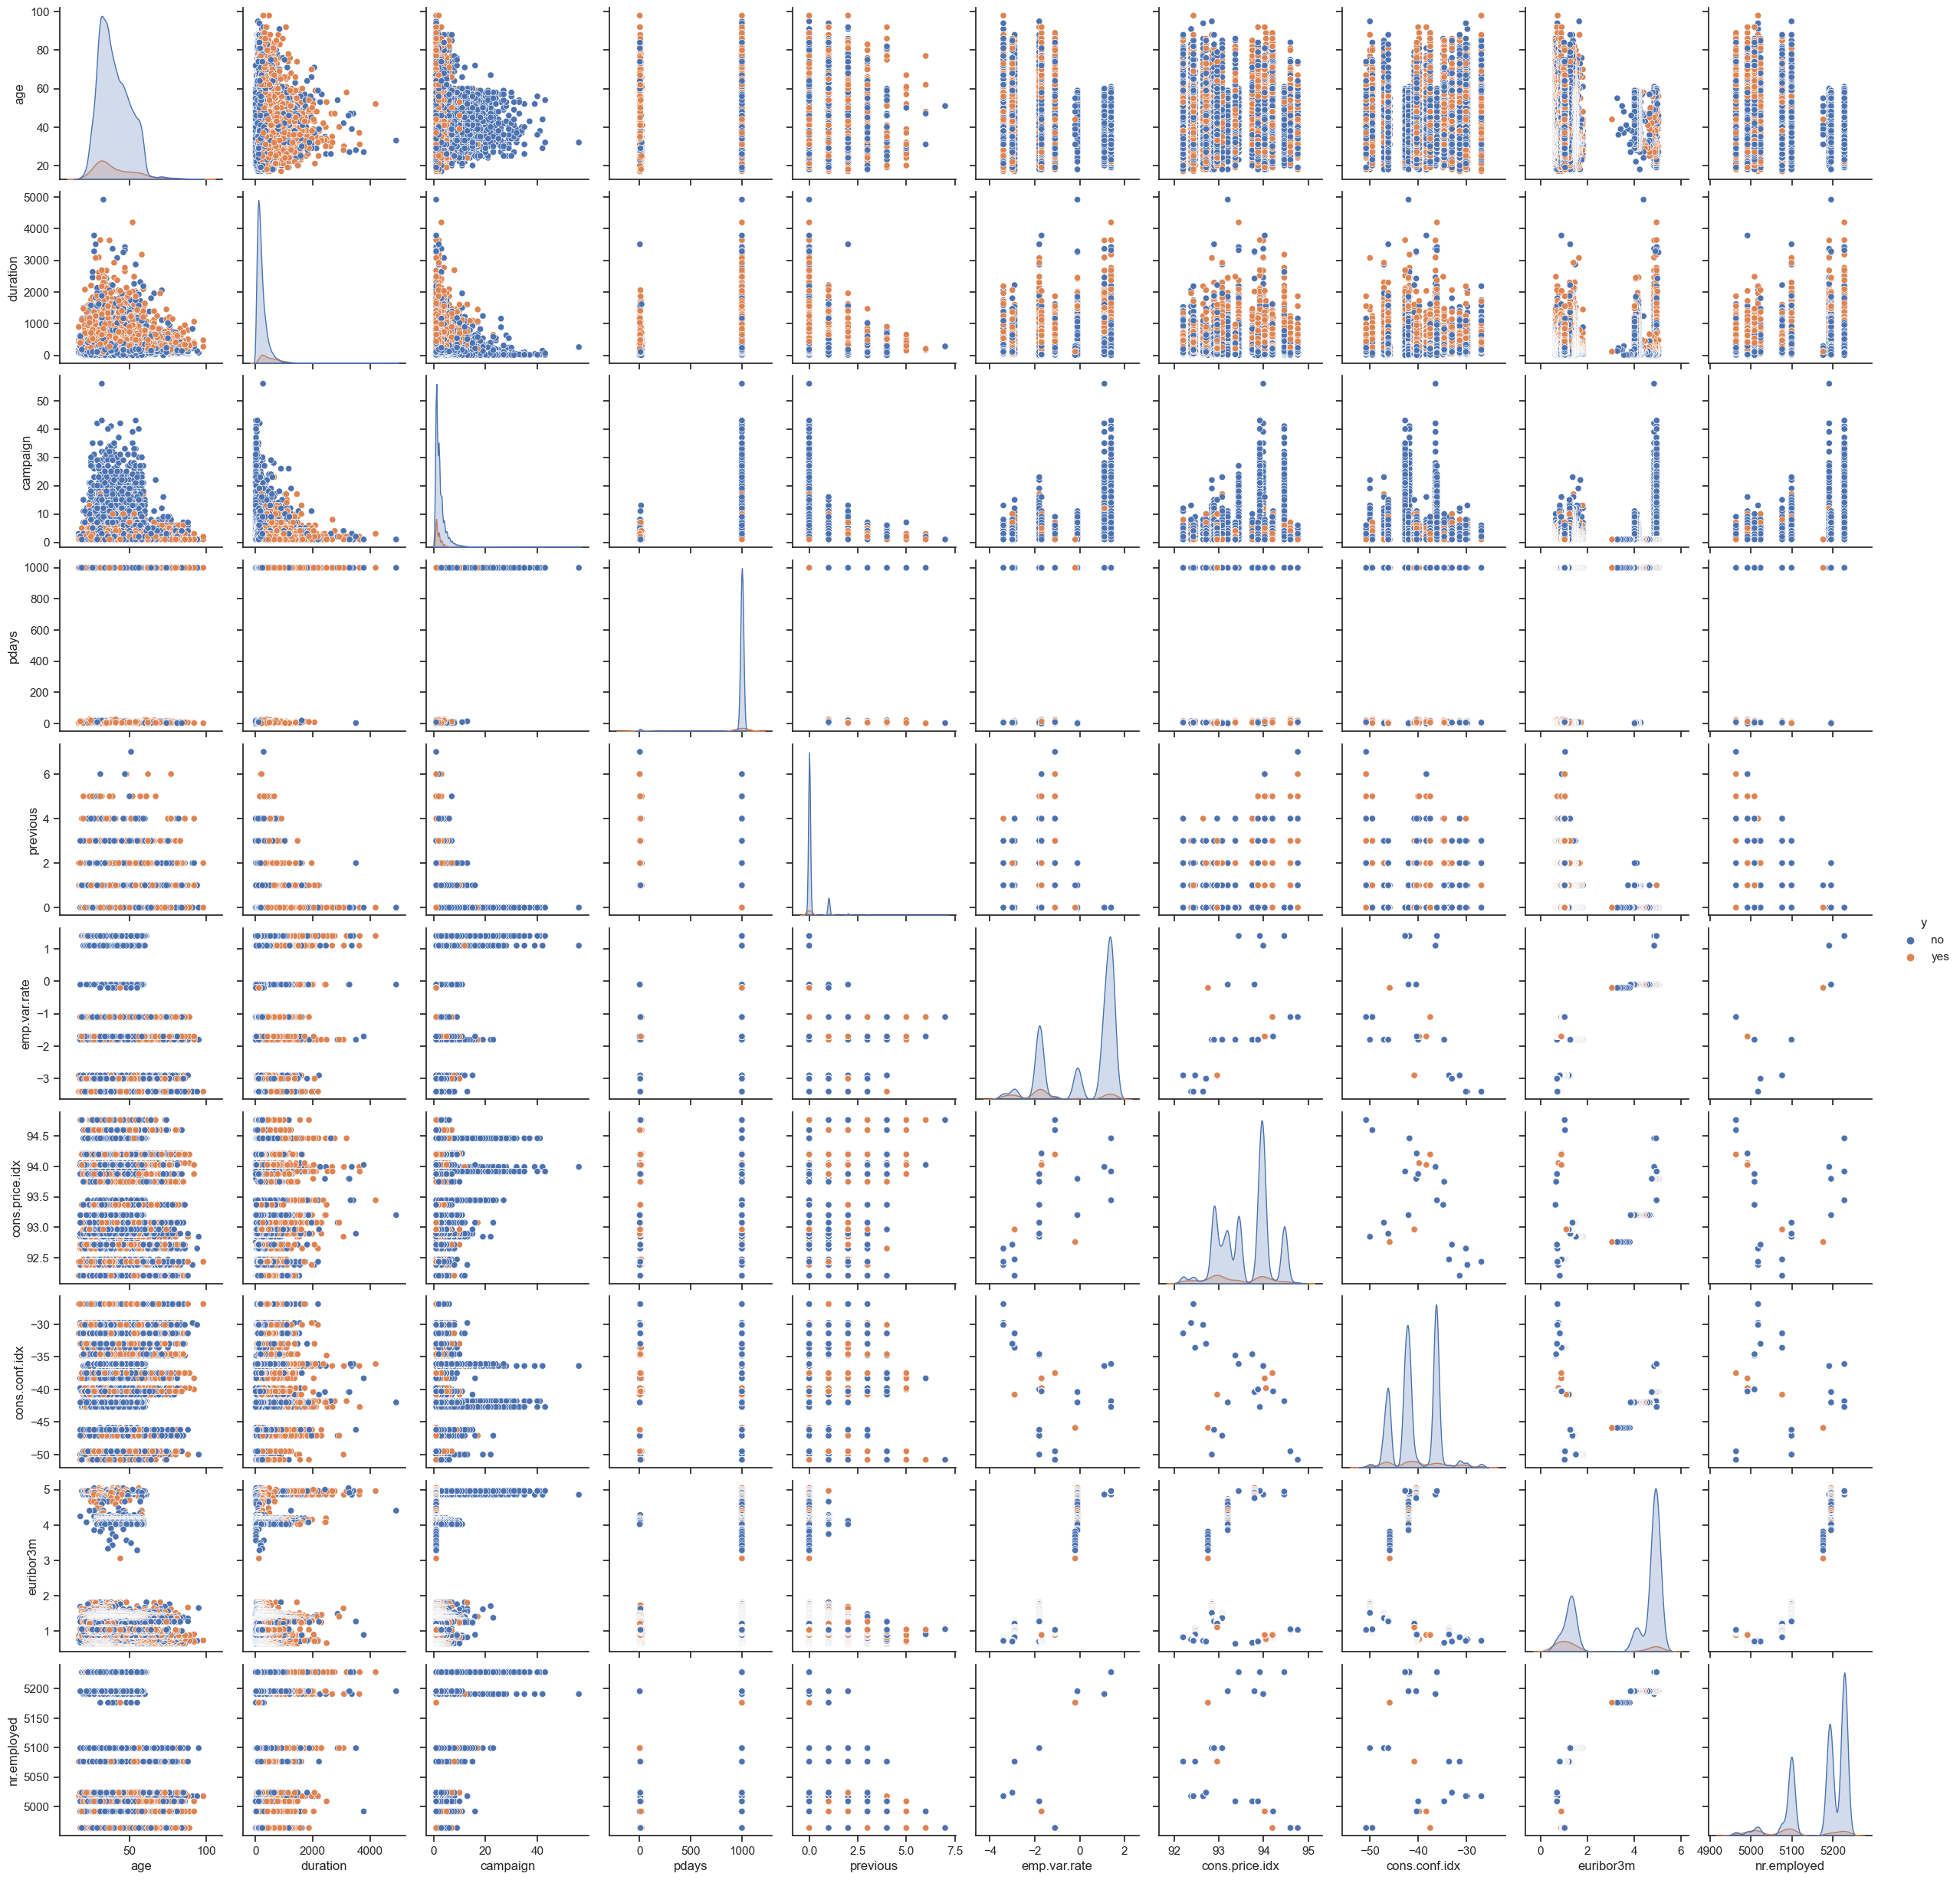

In [13]:
sns.set(style="ticks")
sns.pairplot(df, hue="y", diag_kind="kde", markers="o")
plt.show()

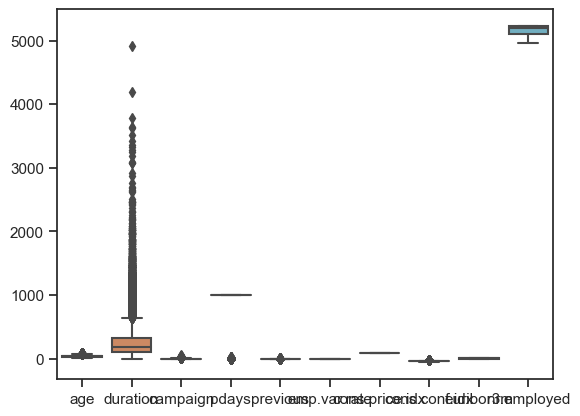

In [14]:
#Finding outliers

# Box plots
sns.boxplot(data=df)
plt.show()

In [15]:
unique_values = df.nunique()

# Display the unique values for each column
print(unique_values)

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


In [16]:
df.interpolate(method='linear', inplace=True)  # Linear interpolation
df.interpolate(method='polynomial', order=2, inplace=True)  # Polynomial interpolation


In [17]:
missing_values_count = df.isna().sum()

# Alternatively, you can use .isnull().sum() instead of .isna().sum()
# missing_values_count = df.isnull().sum()

print(missing_values_count)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [18]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [19]:
# List of columns you want to label encode
columns_to_encode = ['month', 'education', 'contact','day_of_week','poutcome','job','marital','loan','housing','y','default']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate through the columns and apply label encoding
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [20]:
z_scores = np.abs(stats.zscore(df))

# Define a threshold for Z-score (e.g., 3 standard deviations)
threshold = 3

# Remove rows with outliers
df_no_outliers = df[(z_scores < threshold).all(axis=1)]
    
df_no_outliers

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,0,1,6,0,0,0,0,7,0,254,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41181,37,0,1,6,0,2,0,0,7,0,281,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0


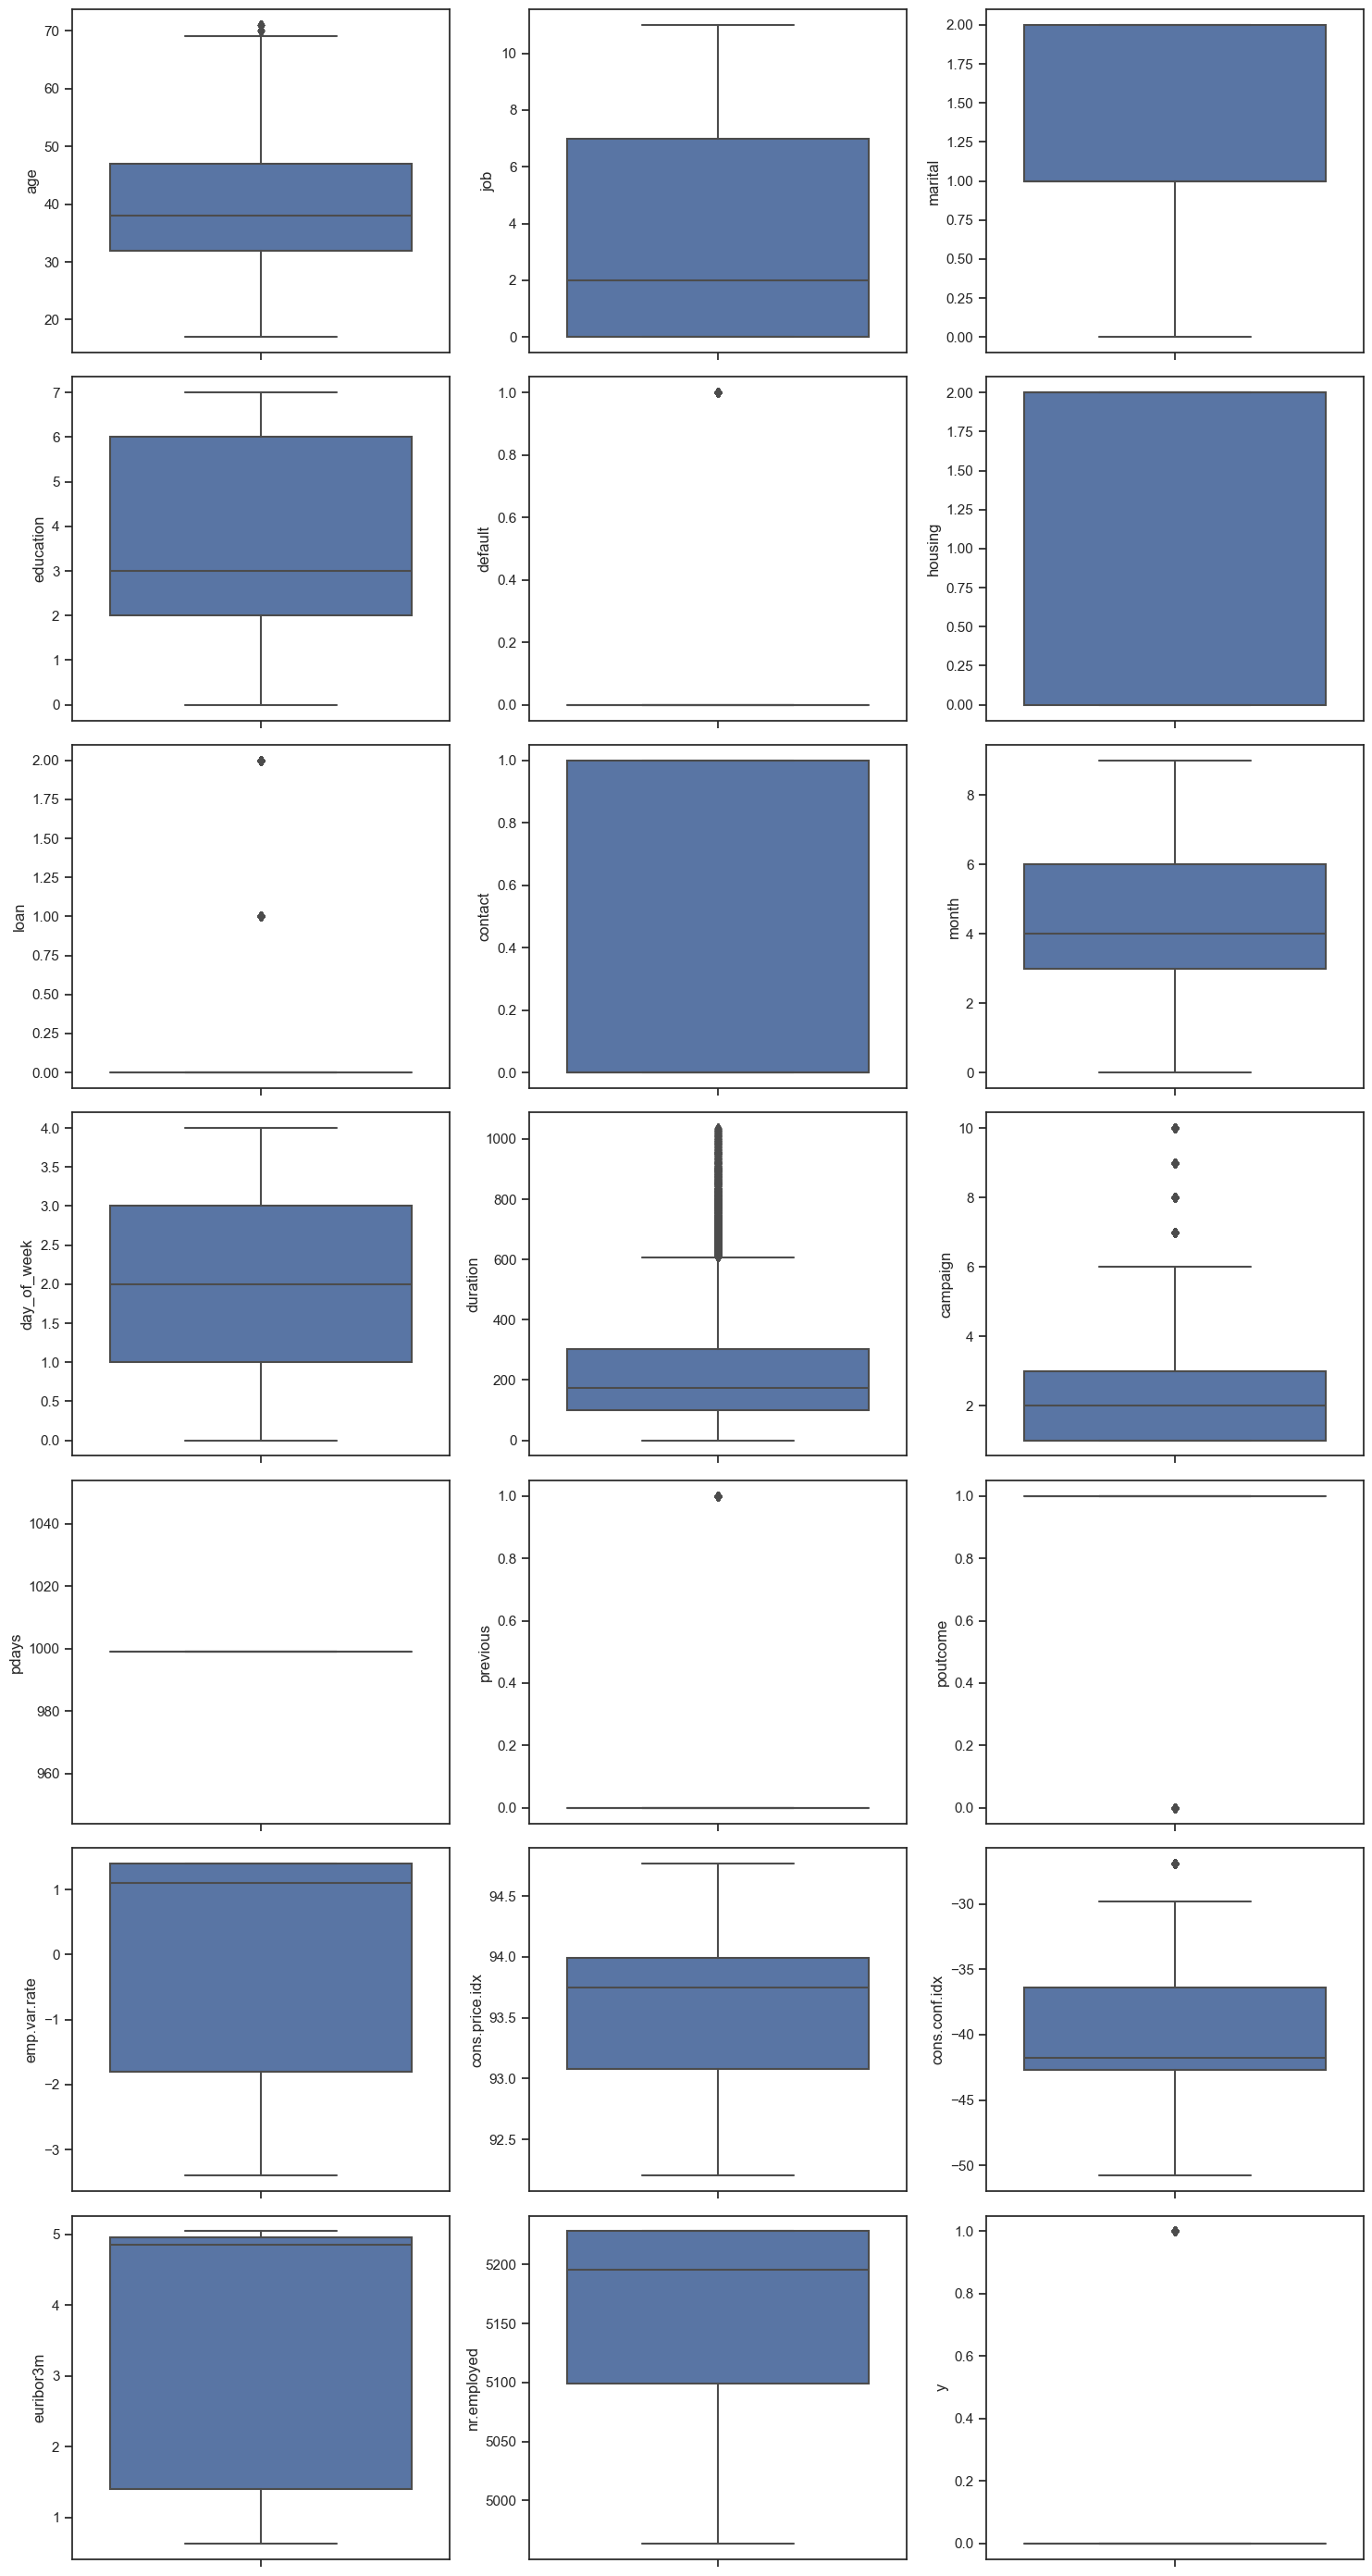

In [21]:
num_cols = len(df_no_outliers.columns)

# Create subplots with three columns
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 4 * num_rows))

# Iterate through columns and create box plots
for i, column in enumerate(df_no_outliers.columns):
    row = i // 3
    col = i % 3
    sns.boxplot(data=df_no_outliers, y=column, ax=axes[row, col], showfliers=True)  # Set showfliers=True to display outliers

# Remove any empty subplots if the number of columns is not a multiple of 3
if num_cols % 3 != 0:
    for i in range(num_cols % 3, 3):
        fig.delaxes(axes[row, i])

plt.tight_layout()
plt.show()

In [22]:
df_no_outliers.reset_index(drop=True, inplace=True)
df_no_outliers

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37239,36,0,1,6,0,0,0,0,7,0,254,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
37240,37,0,1,6,0,2,0,0,7,0,281,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
37241,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
37242,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [23]:
#Calculate the correlation matrix
correlation_matrix = df_no_outliers.corr()


# Define your target variable (column name)
target_variable = 'y'  # Replace 'Target' with your target variable name

# Calculate the absolute correlation values between the target variable and other features
correlation_with_target = abs(correlation_matrix[target_variable])

# Sort the correlations in descending order
sorted_correlations = correlation_with_target.sort_values(ascending=False)

# Specify the number of top features you want to extract
num_top_features = 10  # Adjust this value as needed

# Extract the top features and their correlation values
top_features = sorted_correlations.index[1:num_top_features + 1]
top_correlation_values = sorted_correlations[1:num_top_features + 1]

# Create a DataFrame to display the top features and their correlation values
top_features_df = pd.DataFrame({'Feature': top_features, 'Correlation': top_correlation_values})

# Print the top features and their correlation values
print("Top Features with Correlation Values:")
print(top_features_df)

Top Features with Correlation Values:
                       Feature  Correlation
duration              duration     0.390112
nr.employed        nr.employed     0.282130
emp.var.rate      emp.var.rate     0.256634
euribor3m            euribor3m     0.252675
cons.price.idx  cons.price.idx     0.154248
contact                contact     0.120437
default                default     0.083809
education            education     0.055629
marital                marital     0.051961
campaign              campaign     0.049698


In [24]:
X = df_no_outliers.drop('y', axis=1)
y = df_no_outliers['y']

In [25]:


# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model to your data
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Get the names of the features
feature_names = X.columns  # Assuming you're using a DataFrame

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print(feature_importance_df)

           Feature  Importance
10        duration    0.331454
18       euribor3m    0.116313
0              age    0.108434
1              job    0.058057
3        education    0.049892
11        campaign    0.048046
9      day_of_week    0.046214
19     nr.employed    0.045846
17   cons.conf.idx    0.027446
2          marital    0.026885
16  cons.price.idx    0.025733
5          housing    0.023470
8            month    0.019415
15    emp.var.rate    0.018457
6             loan    0.017430
7          contact    0.012227
4          default    0.010217
13        previous    0.007317
14        poutcome    0.007148
12           pdays    0.000000


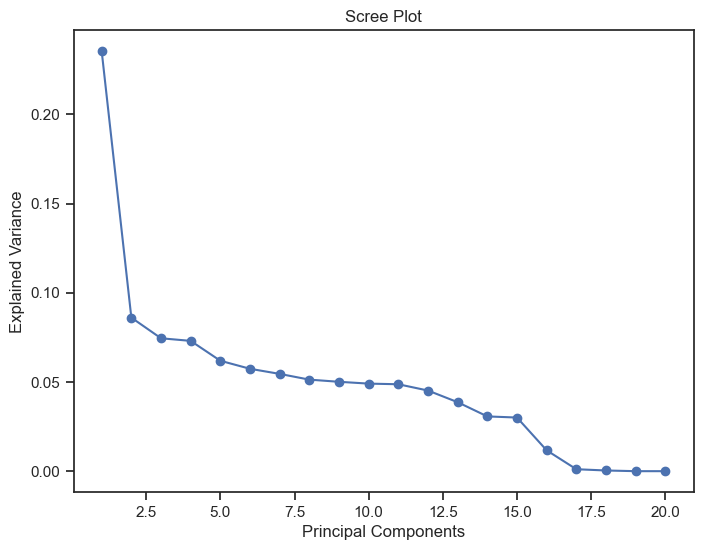

In [26]:
#PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

# Create a PCA instance without specifying the number of components
pca = PCA()

# Fit the PCA model to your data
pca.fit(df_scaled)

# Get the explained variance of each component
explained_variance = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

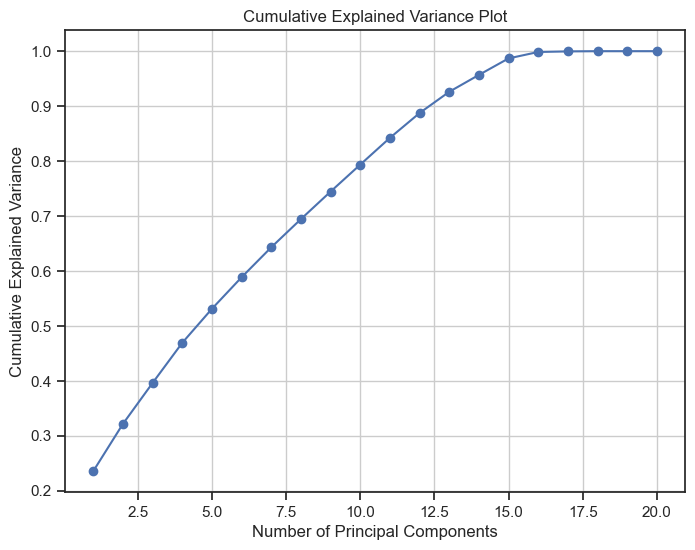

In [27]:
# Calculate the cumulative explained variance
cumulative_variance = explained_variance.cumsum()

# Create a cumulative explained variance plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [28]:
X_pca = pca.transform(X)

loadings = pca.components_

n_selected_components = 0
cumulative_variance = 0

for i, variance in enumerate(explained_variance):
    cumulative_variance += variance
    if cumulative_variance >= 0.70:  # Set your desired explained variance threshold
        n_selected_components = i + 1
        break

# Now you know how many components to keep
print(f"Number of components to keep: {n_selected_components}")

selected_features = X_pca[:, :n_selected_components]
selected_features

Number of components to keep: 9


/Users/mohangunturu/anaconda3/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


array([[-2144.59051705,   157.81858813,  -851.51275418, ...,
           47.33939593,   100.69550853,    99.89082448],
       [-2145.90479883,   159.41853111,  -860.60269694, ...,
           53.45140287,    31.42239467,   110.04571314],
       [-2143.74140304,   150.31304553,  -864.20295957, ...,
           50.13636965,    78.87434735,   100.18096943],
       ...,
       [-2044.64654369,   144.28596114,  -808.33210803, ...,
           35.61805047,   181.09499493,    81.06829779],
       [-2047.31203894,   151.05205904,  -819.18755655, ...,
           47.55229346,    60.15585501,    99.60022307],
       [-2043.86204   ,   141.20959116,  -805.58419987, ...,
           31.95700988,   218.62716279,    70.85542426]])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [29]:
# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)



### Problem 7: Comparing Models

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

## LogisticRegression

In [30]:
# Create the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
start_train= time.time()
model.fit(X_train, y_train)
end_train = time.time()

lrfittime=end_train-start_train

y_pred = model.predict(X_test)


lrtestaccuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

y_pred = model.predict(X_train)

lrtrainaccuracy = accuracy_score(y_train, y_pred)


coefficients = model.coef_
feature_names = X.columns

print(report)


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6842
           1       0.58      0.30      0.39       607

    accuracy                           0.93      7449
   macro avg       0.76      0.64      0.68      7449
weighted avg       0.91      0.93      0.91      7449



/Users/mohangunturu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## KNN

In [31]:
# Create a KNN classifier
model = KNeighborsClassifier(n_neighbors=3)  # Adjust the number of neighbors

# Train the model on the training data
start_train= time.time()
model.fit(X_train, y_train)
end_train = time.time()

knfittime=end_train-start_train

y_pred = model.predict(X_test)


kntestaccuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

y_pred = model.predict(X_train)

kntrainaccuracy = accuracy_score(y_train, y_pred)


print(report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6842
           1       0.48      0.35      0.41       607

    accuracy                           0.92      7449
   macro avg       0.71      0.66      0.68      7449
weighted avg       0.91      0.92      0.91      7449



## Decision Tree

In [32]:
# Create a decision tree classifier
model = DecisionTreeClassifier(max_depth=3)  # Adjust the depth and other hyperparameters

# Train the model on the training data
start_train= time.time()
model.fit(X_train, y_train)
end_train = time.time()

dtfittime=end_train-start_train

y_pred = model.predict(X_test)


dttestaccuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
y_pred = model.predict(X_train)
dttrainaccuracy = accuracy_score(y_train, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6842
           1       0.57      0.30      0.39       607

    accuracy                           0.92      7449
   macro avg       0.75      0.64      0.68      7449
weighted avg       0.91      0.92      0.91      7449



## SVM


In [33]:
# Create an SVM classifier
model = SVC(kernel='linear', C=0.1)  # Adjust the kernel and other hyperparameters

# Train the model on the training data
start_train= time.time()
model.fit(X_train, y_train)
end_train = time.time()

svmfittime=end_train-start_train

y_pred = model.predict(X_test)


svmtestaccuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
y_pred = model.predict(X_train)
svmtrainaccuracy = accuracy_score(y_train, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      6842
           1       0.50      0.44      0.47       607

    accuracy                           0.92      7449
   macro avg       0.72      0.70      0.71      7449
weighted avg       0.91      0.92      0.92      7449



## Comparing Classifiers



###  Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [39]:
res_dict = {'model': ['K Nearest Neighbors', 'Logistic Regression', 'Decision Tree', 'Support Vector Machines'],
           'Train Time': [knfittime,lrfittime, dtfittime, svmfittime],
           'Train Accuracy': [kntrainaccuracy,lrtrainaccuracy, dttrainaccuracy, svmtrainaccuracy],
           'Test Accuracy': [kntestaccuracy,lrtestaccuracy, dttestaccuracy, svmtestaccuracy]}
results_df = pd.DataFrame(res_dict).set_index('model')

results_df

,Train Time,Train Accuracy,Test Accuracy
model,,,
K Nearest Neighbors,0.006158,0.952710,0.916633
Logistic Regression,0.119023,0.926934,0.925225
Decision Tree,0.162747,0.927874,0.924151
Support Vector Machines,5.965148,0.918342,0.918244


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions